# 特異スペクトルによる異常検知

変化点検知に使われるアルゴリズムです。
過去の特徴ベクトルと今の特徴ベクトルのパターンを特異値分解(SVD)でもとめ，これらを比べることで変化点を見つけます。比較的単純な方法ですが，定常区間が長い信号に対しては，有効な手段となります。

original python module from https://github.com/tsurubee/banpei

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def extract_matrix(data, start, end, w):
    row = w
    column = end - start + 1
    matrix = np.empty((row, column))
    i = 0
    for t in range(start, end+1):
        matrix[:, i] = data[t-1:t-1+row]
        i += 1

    return matrix

#Singular Spectrum Transformation
def sst(data, w, m=2, k=None, L=None):

    # Set variables
    if not isinstance(data, np.ndarray):
        data = np.array(data)
    if k is None:
        k = w // 2
    if L is None:
        L = k // 2
    T = len(data)

    # Calculation range
    start_cal = k + w
    end_cal = T - L + 1

    # Calculate the degree of change
    change_scores = np.zeros(len(data))
    for t in range(start_cal, end_cal + 1):
        # Trajectory matrix
        start_tra = t - w - k + 1
        end_tra = t - w
        tra_matrix = extract_matrix(data, start_tra, end_tra, w)

        # Test matrix
        start_test = start_tra + L
        end_test = end_tra + L
        test_matrix = extract_matrix(data, start_test, end_test, w)

        # Singular value decomposition(SVD)
        U_tra, _, _  = np.linalg.svd(tra_matrix, full_matrices=False)
        U_test, _, _ = np.linalg.svd(test_matrix, full_matrices=False)
        U_tra_m  = U_tra[:, :m]
        U_test_m = U_test[:, :m]
        s = np.linalg.svd(np.dot(U_tra_m.T, U_test_m), full_matrices=False, compute_uv=False)
        change_scores[t] = 1 - s[0]

    return change_scores

In [20]:
def getdata():
  #!wget "www.dropbox.com/s/x3fmb9mxr4xkip3/qtdbsel102.txt" #ローカルにコピーしてくる
  LEN=3000  #分析区間

  SP=0         #学習用データの開始点
  AP=3000   #テスト用データの開始点　個のデータの場合 4250ポイント付近に異常がある
  data = np.loadtxt("ipynbs/qtdbsel102.txt",delimiter="\t")
  print("データ数:",data.shape[0],"  次元数:",data.shape[1])

  #元データは3次元の時系列，3次のデータ(indexとしては2)を指定して学習/テストデータに分割
  train_org = data[SP:SP+LEN, 2]      #学習用データとして 1～2999サンプル区間を使用
  test_org  = data[AP:AP+LEN, 2]    #テスト用データとして3000～5999サンプルを使用
  
  #x軸
  x=np.arange(SP,SP+LEN)

  return x, train_org, test_org

In [21]:
x, train_org, test_org = getdata()

データ数: 45000   次元数: 3


In [22]:
change_scores = sst(test_org, 50)

<module 'matplotlib.pyplot' from 'C:\\Users\\hamag\\Anaconda3\\envs\\KerasGen\\lib\\site-packages\\matplotlib\\pyplot.py'>

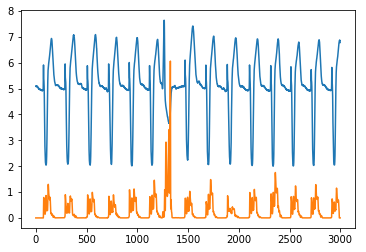

In [23]:
plt.plot(test_org)
plt.plot(change_scores*10000)
plt